In [1]:
import tensorflow as tf
from keras.applications import MobileNetV3Small
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Found 2149 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


4334752/4334752 [==============================] - 1s 0us/step


Epoch 1/15



34/34 [==============================] - 116s 3s/step - loss: 0.2915 - accuracy: 0.8827
Epoch 2/15
34/34 [==============================] - 64s 2s/step - loss: 0.0483 - accuracy: 0.9819
Epoch 3/15
34/34 [==============================] - 68s 2s/step - loss: 0.0146 - accuracy: 0.9967
Epoch 4/15
34/34 [==============================] - 62s 2s/step - loss: 0.0089 - accuracy: 0.9972
Epoch 5/15
34/34 [==============================] - 62s 2s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 6/15
34/34 [==============================] - 61s 2s/step - loss: 0.0106 - accuracy: 0.9963
Epoch 7/15
34/34 [==============================] - 62s 2s/step - loss: 0.0146 - accuracy: 0.9940
Epoch 8/15
34/34 [==============================] - 62s 2s/step - loss: 0.0083 - accuracy: 0.9972
Epoch 9/15
34/34 [==============================] - 62s 2s/step - loss: 0.0030 - accuracy: 0.9991
Epoch 10/15
34/34 [==============================] - 62s 2s/step - loss: 0.0033 - accuracy: 0.9991
Epoch 11/15
34/34 [==========

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


KeyError: 'val_accuracy'

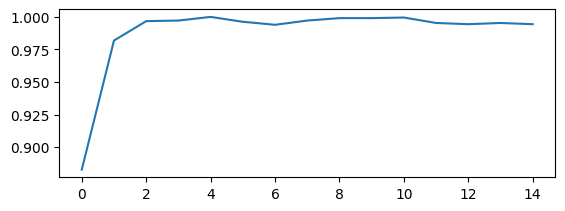

In [2]:
epochs = 15
batch_size = 64

# Data loading and preprocessing
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    './val/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

# Load MobileNetV3
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Modify for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)  # Using sigmoid for binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

model.save('MobilenetV3small.h5')

# Plotting the training and validation results
plt.figure(1)

# Accuracy plot
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()